In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv(".\HUNT\HUNT_USDT_transactions.csv")
data["block_timestamp"] = pd.to_datetime(data["block_timestamp"])

Monthly Transaction Count

In [4]:
ONLY_MONTH = data["block_timestamp"].groupby([data["block_timestamp"].dt.month]).agg("count")
ONLY_MONTH = ONLY_MONTH.to_frame(name = "transaction_count")
ONLY_MONTH["month"] = ONLY_MONTH.index
ONLY_MONTH.index = ([i for i in range(ONLY_MONTH.shape[0])])

<AxesSubplot:xlabel='month', ylabel='transaction_count'>

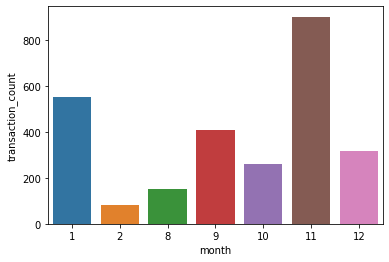

In [5]:
sns.barplot(data = ONLY_MONTH, x = "month", y = "transaction_count")

Hourly Version of Transaction Count

In [6]:
ONLY_HOUR = data["block_timestamp"].groupby([data["block_timestamp"].dt.hour]).agg("count")
ONLY_HOUR = ONLY_HOUR.to_frame(name = "transaction_count")
ONLY_HOUR["hour"] = ONLY_HOUR.index
ONLY_HOUR.index = ([i for i in range(ONLY_HOUR.shape[0])])

<AxesSubplot:xlabel='hour', ylabel='transaction_count'>

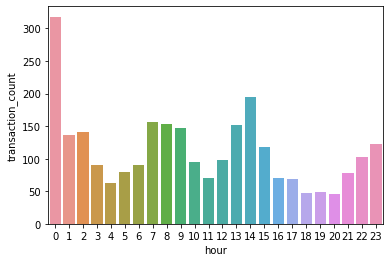

In [7]:
sns.barplot(data = ONLY_HOUR, x = "hour", y = "transaction_count")

In [8]:
data = data.replace(np.nan, 0)
LAST_30_DAYS = data[data["block_timestamp"] >= (pd.Timestamp.today() - pd.Timedelta(days = 30))]
LAST_30_DAYS["Sum"] = LAST_30_DAYS["HUNT_in($)"] + LAST_30_DAYS["HUNT_out($)"]
LAST_30_DAYS = LAST_30_DAYS.groupby([LAST_30_DAYS["block_timestamp"].dt.day]).agg("mean")

C:\Users\user\AppData\Local\Temp\ipykernel_12028\3565904856.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LAST_30_DAYS["Sum"] = LAST_30_DAYS["HUNT_in($)"] + LAST_30_DAYS["HUNT_out($)"]
C:\Users\user\AppData\Local\Temp\ipykernel_12028\3565904856.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  LAST_30_DAYS = LAST_30_DAYS.groupby([LAST_30_DAYS["block_timestamp"].dt.day]).agg("mean")


In [9]:
LAST_30_DAYS["Time"] = LAST_30_DAYS.index
LAST_30_DAYS.index = [i for i in range(LAST_30_DAYS.shape[0])]

<AxesSubplot:xlabel='Time', ylabel='Sum'>

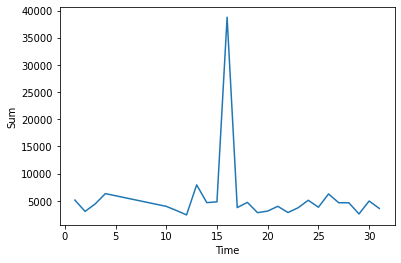

In [10]:
sns.lineplot(LAST_30_DAYS, x = "Time", y = "Sum")